In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\anami\Downloads\store-sales-time-series-forecasting\train.csv")

df['date'] = pd.to_datetime(df['date'])
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [10]:
# Select features that influence sales
features = ['store_nbr', 'onpromotion']
if 'is_holiday' in df.columns:
    features.append('is_holiday')
if 'store_type' in df.columns:
    features.append('store_type')
if 'onpromotion' in df.columns:
    features.append('onpromotion')

# Add time-based features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
features.extend(['day', 'month', 'year'])

X = df[features]
y = df['sales']
X.head()

,store_nbr,onpromotion,day,month,year
0,1,0,1,1,2013
1,1,0,1,1,2013
2,1,0,1,1,2013
3,1,0,1,1,2013
4,1,0,1,1,2013


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2400710, 5), (600178, 5))

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Model training complete.')

Model training complete.


In [6]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 435.27
Root Mean Squared Error (RMSE): 1006.84


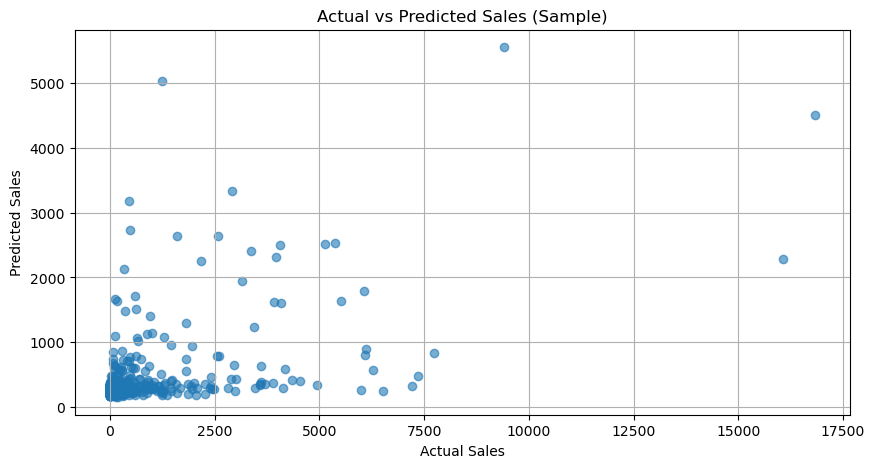

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(y_test[:1000], y_pred[:1000], alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Sample)')
plt.grid(True)
plt.show()

In [8]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
1,onpromotion,38.479767
3,month,2.704107
0,store_nbr,2.667184
2,day,-1.589987
4,year,-2.451682
